**Universidade Federal da Bahia - UFBA** 

**Escola Politécnica - Departamento de Engenharia Elétrica e de Computação**

**Disciplina:** Processamento digital de sinais (ENGC63)

**Professor:**  Antônio C. L. Fernandes Jr. 

**Discente:** Walisson Santos Oliveira


<p align="center"><strong>Projeto de Filtro FIR </p> 

---

Para realização do respectivo projeto, foi escolhido o seguinte enunciado:

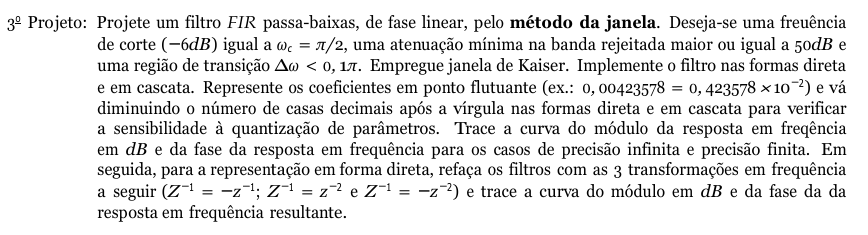

* Entendendo o enunciado:

    1. **O que é um filtro FIR? -->**
        FIR significa Finite Impulse Response (Resposta Finita ao Impulso). Ou seja, é um filtro que tem resposta ao impulso finita e sua função de sistema (ou função transferência) H(z) não tem polos, exceto em z=0. Em outras palavras, esse filtro não tem realimentação.

    2. **O que é um filtro FIR passa-baixas? -->** 
        É um fltro que atenua altas frequências e deixa passar baixas frequências, ou seja: sendo wc a frequência de corte, para |ω| < |ωc| o ganho é igual a 1 e para |ω| > |ωc| o ganho é zero. Para esse projeto, a especificação é que ωc = π/2.

    3. **O que é um filtro FIR passa-baixas de fase-linear? -->** 
        A fase indica quanto cada frequência é atrasada ou adiantada no tempo pelo sistema. Um filtro não só altera o "quanto passa" de cada frequência, mas também o quanto ele atrasa de cada frequência. Se os atrasos forem diferentes para cada frequência, há uma distorção na forma do sinal. Portanto, um sistema tem fase linear quando todas as frequências são atrasadas igualmente e o atraso de grupo é constante. Em outras palavras, a forma do sinal não muda. 

    4. **O que significa fazer um projeto de filtro pelo método de janela? -->**

        *   O método da janela é uma técnica para projetar filtros FIR, partindo de um filtro ideal que não é implementável, e transformando-o em um filtro realizável. Veja, o filtro passa-baixas ideal não é implementável em um computador porque sua resposta o impulso vai do menos infinito ao infinito e não é causal.

        *   O método janela faz o seguinte: h[n]=hd​[n]⋅ω[n], onde h[n] é o filtro implementável, hd​[n] é a resposta ao impulso ideal (infinita) e  ω[n] é a janela finita. Uma multiplicação no tempo implica em uma convolução na frequência, portanto H(e^jω)=Hd​(e^jω)∗W(e^jω).

        *   Isso causa uma transição não mais abrupta e oscilações na banda passante e de rejeição do filtro a ser implementado.

        *   Existem vários tipos de janela, como a retangular, Hamming, Hann, Barlett, Blackman. No entanto, a janela de Kaiser possibilita projetar o melhor filtro para a especificação, pois permite ser ajustável tanto na largura da banda de transição quanto na atenuação da banda rejeitada. 

        *   Esse caráter "ajustável" da janela de kaiser se deve a incorporação da fase linear generalizada. Considere ω[n] uma janela: 

            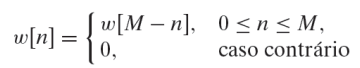

            onde sua transformada de fourier tem forma: 

            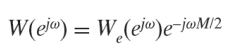

            A reposta em frequência resultante terá uma fase linear generalizada da forma:

            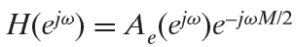

            De maneira mais generalizada:

            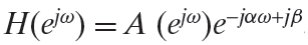

            A definição da janela de kaiser nos mostra que sua forma é: 

            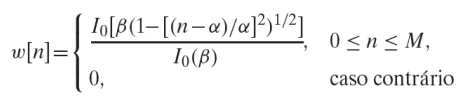

            Variações em beta e M (ordem do filtro ) permitem essa ajustabilidade da janela de kaiser. Lembre-se que alfa = M/2. 


Uma vez entendido essa introdução, faz-se necessário instalar as seguintes bibliotecas abaixo.Elas nos fornecerão ferramentas importantes para realização do projeto. Para isso, no terminal, execute:

```bash
        pip install numpy matplotlib scipy
```

Importações necessárias:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal

#### **Item 1:** Projete um filtro FIR passa-baixas, de fase linear, pelo método da janela. Deseja-se uma frequencia de corte (−6dB) igual a ωc = π/2, uma atenuação mínima na banda rejeitada maior ou igual a 50dB e uma região de transiçã ∆ω < 0,1π.  Empregue janela de Kaiser. Implemente o filtro nas formas direta e em cascata.

Definindo especificações do projeto:

In [3]:
wc = 0.5 * np.pi # Frequência de corte (rad/s)
atenuacao_db = 50.0 # Atenuação mínima na banda rejeitada (dB)
largura_transicao = 0.1 * np.pi # Largura da banda de transição (rad/s)

Cálculo da ordem do filtro e do parâmetro beta da janela de Kaiser:

Como sabemos,  a janela de Kaiser tem dois parâmetros: 

*   o comprimento --> M+1
*   o parâmetro de forma β.

In [5]:
N, beta = signal.kaiserord(atenuacao_db, largura_transicao/np.pi)
print(f'Ordem do filtro M = {N - 1}, Beta = {beta}, Comprimento do filtro M+1 = {N}')

Ordem do filtro M = 59, Beta = 4.533514120981248, Comprimento do filtro M+1 = 60


Como a ordem do filtro M = 59 e M é um inteiro ímpar, o **sistema de fase linear resultante seria do tipo II**

Projeto do filtro FIR usando a janela de Kaiser e implementação:

* **Diferença da forma direta e cascata:**

    *   **Forma direta:** Os filtros FIR tipicamente são realizados por meio da implementação de uma equação de diferenças linear com coeficientes constantes na forma.

        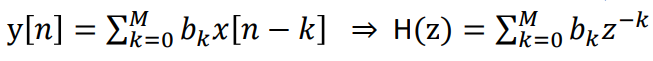
    
    * **Forma direta:** A função de transferência do filtro é fatorada em uma série de seções de ordem mais baixa (geralmente de primeira ou segunda ordem), que são então conectadas em série (cascata). O sinal de saída de uma seção é a entrada da próxima.

        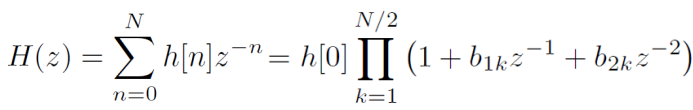

    *   A forma direta corresponde à implementação dessa função por meio da equação de convolução no tempo, enquanto a forma em cascata resulta da fatoração de 𝐻(𝑧) em filtros de menor ordem conectados em série.

Coeficientes do filtro: [ 4.23478081e-04  6.01794885e-04 -8.15510001e-04 -1.06858910e-03
  1.36528768e-03  1.71019999e-03 -2.10832614e-03 -2.56516332e-03
  3.08682897e-03  3.68022707e-03 -4.35327277e-03 -5.11519724e-03
  5.97696448e-03  6.95184702e-03 -8.05623147e-03 -9.31076398e-03
  1.07420108e-02  1.23849207e-02 -1.42865766e-02 -1.65120928e-02
  1.91542374e-02  2.23498459e-02 -2.63093603e-02 -3.13736269e-02
  3.81326423e-02  4.77026060e-02 -6.24778906e-02 -8.86876910e-02
  1.49179179e-01  4.49598222e-01  4.49598222e-01  1.49179179e-01
 -8.86876910e-02 -6.24778906e-02  4.77026060e-02  3.81326423e-02
 -3.13736269e-02 -2.63093603e-02  2.23498459e-02  1.91542374e-02
 -1.65120928e-02 -1.42865766e-02  1.23849207e-02  1.07420108e-02
 -9.31076398e-03 -8.05623147e-03  6.95184702e-03  5.97696448e-03
 -5.11519724e-03 -4.35327277e-03  3.68022707e-03  3.08682897e-03
 -2.56516332e-03 -2.10832614e-03  1.71019999e-03  1.36528768e-03
 -1.06858910e-03 -8.15510001e-04  6.01794885e-04  4.23478081e-04]


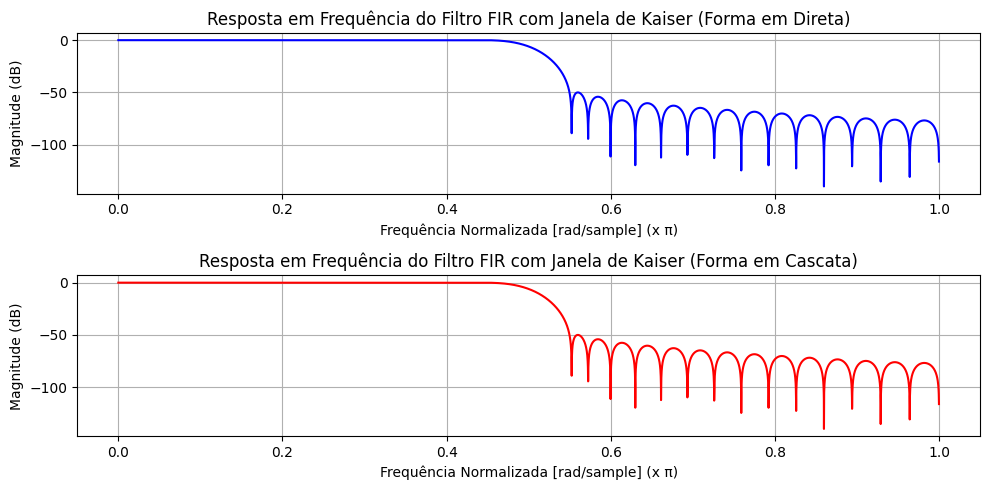

In [6]:
coef = signal.firwin(N, wc/np.pi, window=('kaiser', beta)) #firwin projeta o filtro FIR passa-baixa de ordem N e fase linear
# retorna os coeficientes do filtro
print(f'Coeficientes do filtro: {coef}')
# Resposta em frequência do filtro
w, h = signal.freqz(coef, worN=8000) # freqz calcula a resposta em frequência
# retorna w (frequências) e h (resposta em frequência)

coef_casc = signal.tf2sos(coef, [1.0]) # tf2sos converte os coeficientes do filtro para a forma em cascata de seções de segunda ordem
w_casc, h_casc = signal.sosfreqz(coef_casc, worN=8000)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))

ax1.plot(w/np.pi, 20 * np.log10(np.abs(h)), 'b')
ax1.set_title('Resposta em Frequência do Filtro FIR com Janela de Kaiser (Forma em Direta)')
ax1.set_xlabel("Frequência Normalizada [rad/sample] (x π)")
ax1.set_ylabel('Magnitude (dB)')
ax1.grid()

ax2.plot(w_casc/np.pi, 20 * np.log10(np.abs(h_casc)), 'r')
ax2.set_title('Resposta em Frequência do Filtro FIR com Janela de Kaiser (Forma em Cascata)')
ax2.set_xlabel("Frequência Normalizada [rad/sample] (x π)")
ax2.set_ylabel('Magnitude (dB)')
ax2.grid()

plt.tight_layout()
plt.show()


Forma direta e forma em cascata **não são filtros diferentes**, e sim apenas implementações diferentes do mesmo filtro. Portanto suas respostas em frequência tem que ser iguais.

#### **Item 2:**  Represente os coeficientes em ponto flutuante (ex.:  0, 00423578 = 0, 423578 × 10−2) e vá diminuindo o número de casas decimais após a vírgula nas formas direta e em cascata para verificar a  sensibilidade  á  quantização  de  parâmetros.

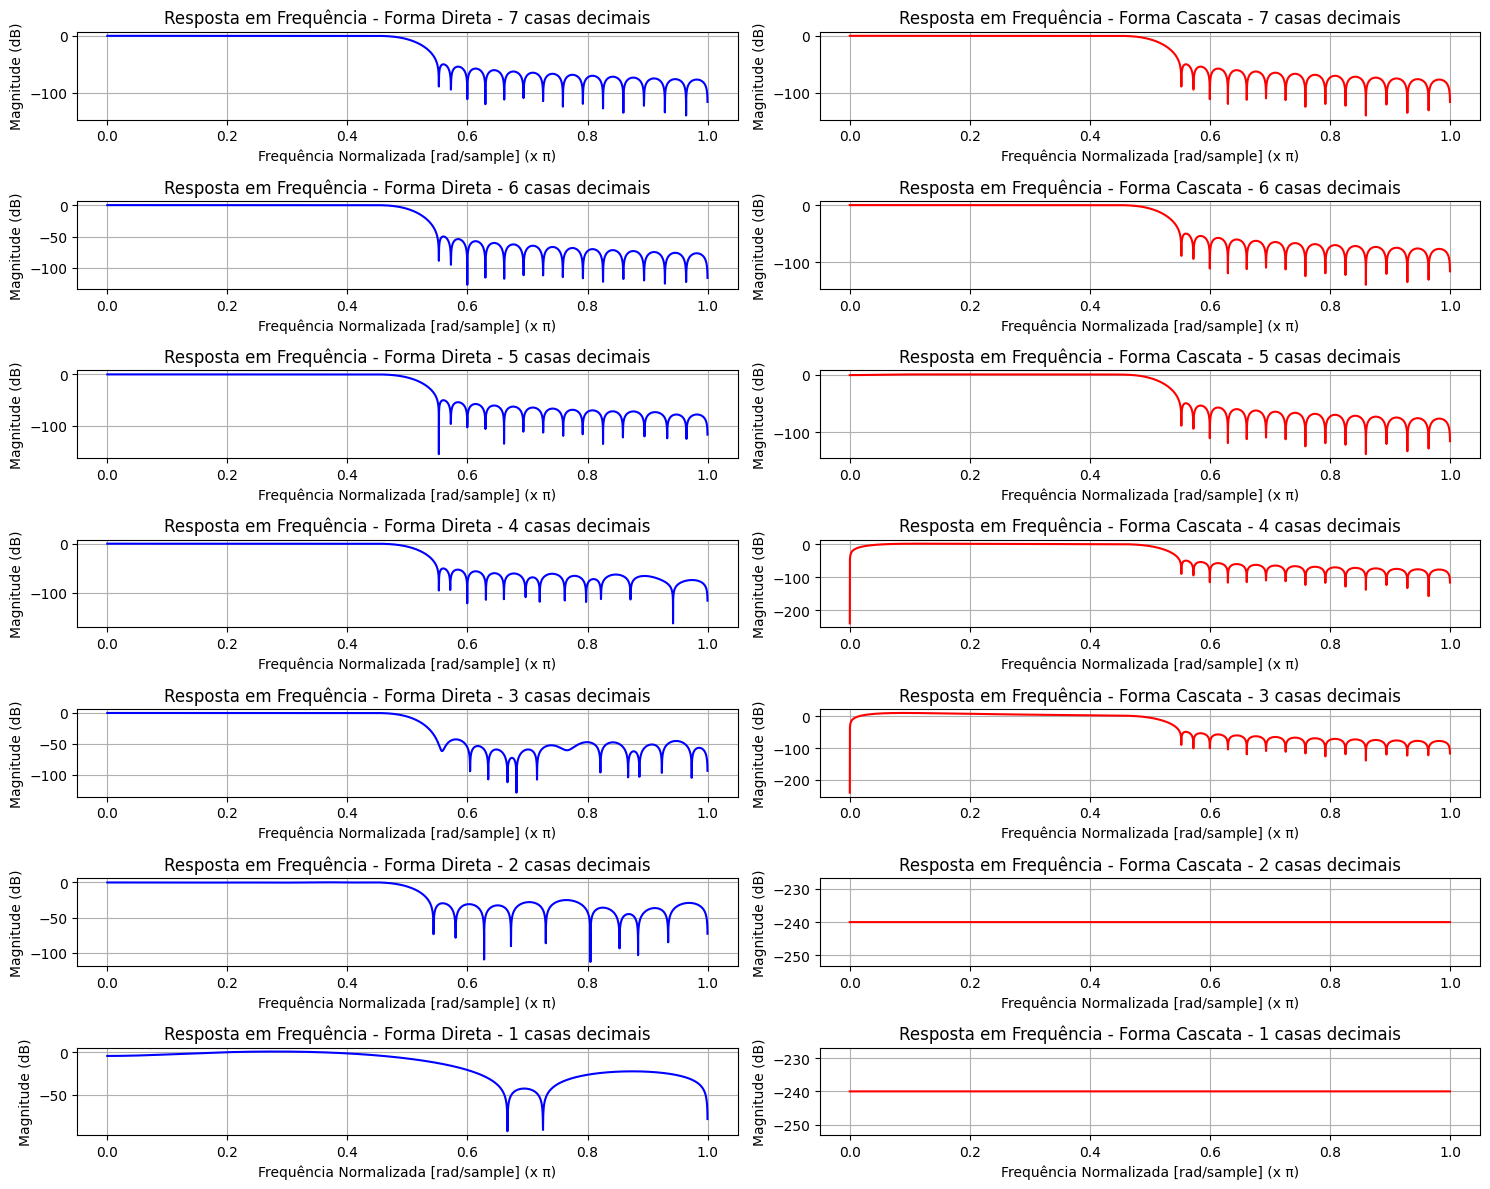

In [ ]:
precisoes = [7,6,5,4,3,2,1] # coloquei até 7 casas decimais para ver melhor a diferença

fig, axs = plt.subplots(len(precisoes), 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3) 

for i, dec in enumerate(precisoes):
    coef_quant = np.round(coef, dec)
    w,h = signal.freqz(coef_quant, worN=8000)

    coef_casc_quant = np.round(coef_casc, dec)
    w_casc_q, h_casc_q = signal.sosfreqz(coef_casc_quant, worN=8000)

    axs[i, 0].plot(w/np.pi, 20 * np.log10(np.abs(h)), 'b')
    axs[i, 0].set_title(f'Resposta em Frequência - Forma Direta - {dec} casas decimais')
    axs[i, 0].set_xlabel("Frequência Normalizada [rad/sample] (x π)")
    axs[i, 0].set_ylabel('Magnitude (dB)')
    axs[i, 0].grid()

    eps = 1e-12 # para evitar log(0)
    mag_db = 20 * np.log10(np.maximum(np.abs(h_casc_q), eps))

    axs[i, 1].plot(w_casc_q/np.pi, mag_db, 'r')
    axs[i, 1].set_title(f'Resposta em Frequência - Forma Cascata - {dec} casas decimais')
    axs[i, 1].set_xlabel("Frequência Normalizada [rad/sample] (x π)")
    axs[i, 1].set_ylabel('Magnitude (dB)')  
    axs[i, 1].grid()

plt.tight_layout()
plt.show()

Observa-se que, à medida que a precisão dos coeficientes é reduzida, **a forma direta apresenta degradação significativa na banda rejeitada**, enquanto a implementação em cascata demonstra maior robustez à quantização, mantendo melhor as especificações de atenuação do filtro. Além disso, verifica-se que a forma em cascata é mais robusta quando quantizada, porém **pode chegar ao colapso quando isso não ocorre corretamente**, como é o caso para 1 e 2 casas decimais. Isso prova a **sensibilidade extrema á uma quantização severa da forma em cascata**.

Na forma direta, erros de quantização afetam todos os coeficientes simultaneamente, acumulando erro ao longo da soma. Na forma em cascata, o erro é distribuído em seções de baixa ordem, reduzindo o impacto global na resposta em frequência.

#### **Item 3:**  Trace a curva do módulo  da  resposta  em  frequência em dB e da fase da resposta em frequência para os casos de precisão  infinita e precisão finita.

Achando o módulo e fase para o caso da precisão infinita:

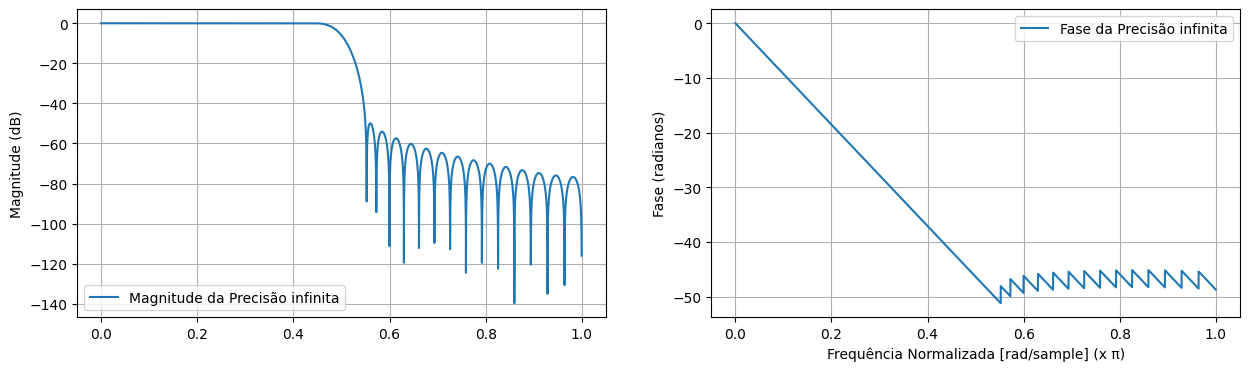

In [9]:
w, h = signal.freqz(coef, worN=8000)

mag_inf = 20 * np.log10(np.abs(h))
fase_inf = np.unwrap(np.angle(h))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,4))

ax1.plot(w/np.pi, mag_inf, label='Magnitude da Precisão infinita')
ax1.set_ylabel('Magnitude (dB)')
ax1.legend()
ax1.grid()

ax2.plot(w/np.pi, fase_inf, label='Fase da Precisão infinita')
ax2.set_xlabel("Frequência Normalizada [rad/sample] (x π)")
ax2.set_ylabel('Fase (radianos)')
ax2.legend()
ax2.grid()



Esse comportamento da magnitude é esperado e atende as especificações. 

*   Frequência de corte (ωc) = π/2;
*   banda de transição de aproximadamente 0.5π a aproximadamente 0.6π;
*   Banda rejeitada de aproximadamente > 0.6π;
*   atenuação mínima na banda rejeitada maior ou igual a 50dB;

O gráfico da fase também é conforme o esperado:

*   A fase é reta decrescente, significando um comportamento linear e atraso constante. 
*   O comportamento serrilhado na banda de rejeição perde o significado físico.

Achando o módulo e a fase para o caso da precisão finita:

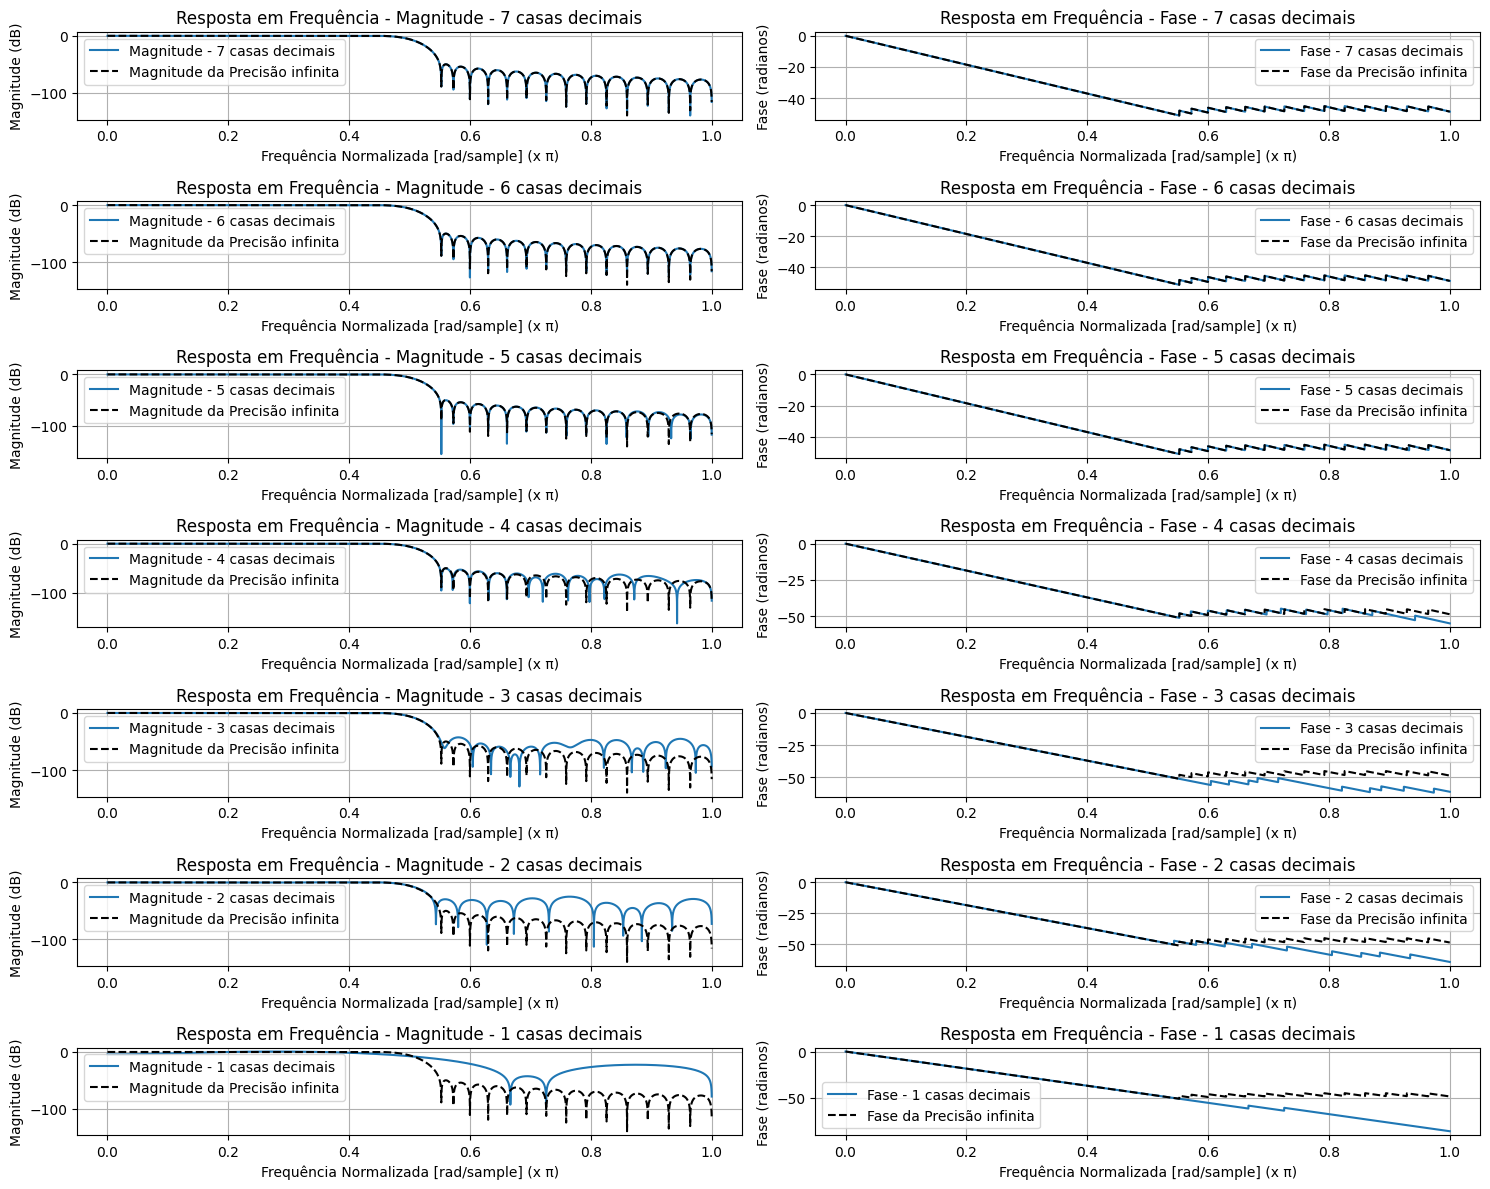

In [10]:
precisoes = [7,6,5,4,3,2,1]

fig, axs = plt.subplots(len(precisoes), 2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.3) 

for i, dec in enumerate(precisoes):
    coef_quant = np.round(coef, dec)
    w,h_fin = signal.freqz(coef_quant, worN=8000)

    mag_fin = 20 * np.log10(np.abs(h_fin))
    fase_fin = np.unwrap(np.angle(h_fin))

    axs[i, 0].plot(w/np.pi, mag_fin, label=f'Magnitude - {dec} casas decimais')
    axs[i, 0].plot(w/np.pi, mag_inf, 'k--', label='Magnitude da Precisão infinita')
    axs[i, 0].set_title(f'Resposta em Frequência - Magnitude - {dec} casas decimais')
    axs[i, 0].set_xlabel("Frequência Normalizada [rad/sample] (x π)")
    axs[i, 0].set_ylabel('Magnitude (dB)')
    axs[i, 0].legend()
    axs[i, 0].grid()    

    axs[i, 1].plot(w/np.pi, fase_fin, label=f'Fase - {dec} casas decimais')
    axs[i, 1].plot(w/np.pi, fase_inf, 'k--', label='Fase da Precisão infinita')
    axs[i, 1].set_title(f'Resposta em Frequência - Fase - {dec} casas decimais')
    axs[i, 1].set_xlabel("Frequência Normalizada [rad/sample] (x π)")
    axs[i, 1].set_ylabel('Fase (radianos)') 
    axs[i, 1].legend()
    axs[i, 1].grid()

plt.tight_layout()
plt.show()

Analisando a magninute, visualiza-se que **o erro de quantização a partir do 4 casas decimais já começa a deslocar os zeros do filtro**. Com 3 casas decimais, as especificações do filtro já deixam de ser atendidas e se agravam mais ainda com 2 e 1 casa decimal, **deixando de rejeitaar altas frequências tal como um passa-baixas**.

Reciprocamente, a fase começa a sofrer desvios com 3 casas decimais. Isso se agrava com 2 e 1 casas decimais, uma vez que atrasa deixa de ser rigorosamente constante e as inclinações não coincidem perfeitamente com a fase da precisão infinita. Para quantizações extremamente grosseiras (1 casa decimal), a fase da resposta em frequência torna-se novamente aproximadamente linear em toda a faixa de frequências. Esse comportamento não indica melhoria do desempenho do filtro, mas sim que **a resposta passa a ser dominada por um atraso quase puro, resultado da perda de seletividade espectral** causada pela quantização severa dos coeficientes. Nessa condição, embora a fase apresente aparência linear, o módulo da resposta evidencia que o filtro deixa de atender às especificações de rejeição.

#### **Item 4:** Em seguida, para a representação em forma direta, refaça  os  filtros  com  as  3  transformações  em  frequência  a  seguir (Z⁻¹ = -z⁻¹, Z⁻¹ = z⁻², Z⁻¹ = -z⁻²) e trace a curva do módulo em dB  e da fase da da resposta em frequência resultante.

1. Transformação Z⁻¹ = -z⁻¹:
    *   Consiste em substituir cada atraso unitário por um atraso com mudança de sinal, ou seja:
    
        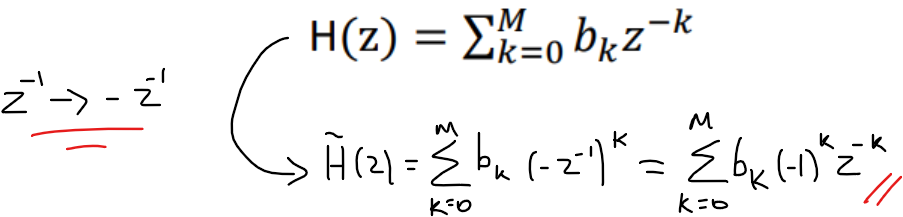

        Essa substituição corresponde à modulação da resposta ao impulso por (-1)^k , o que implica um deslocamento espectral de π radianos na resposta em frequência. Essa transformação preserva a estrutura FIR e a linearidade de fase, promovendo a inversão das bandas de passagem e rejeição. Nesse caso, o filtro vira um passa alta, uma vez que -z⁻¹ = e^(-j(ω +π)). Logo H^~(e^jω) = H(e^(j(ω+ π))).

2. Transformação Z⁻¹ = z⁻²:
    *   Consiste em substituir um atraso unitário por dois atrasos unitários, ou seja: 

        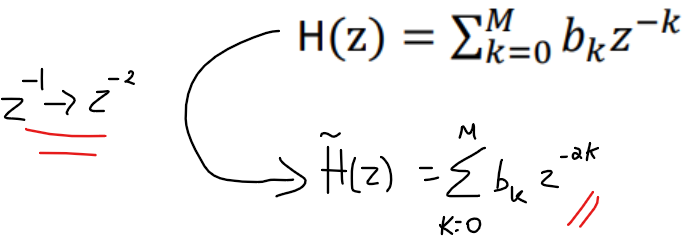

        Essa substituição corresponde à inserção de uma amostra nula entre coeficientes consecutivos da resposta ao impulso, o que resulta na compressão da resposta em frequência por um fator dois e na geração de imagens espectrais. Embora a estrutura permaneça FIR e de fase linear, a implementação torna-se mais sensível a erros numéricos, especialmente na forma direta. Nesse caso, z⁻² = e^(-2jω), logo H^~(e^jω) = H(e^(j2ω)), comprimindo o espectro e replicando a resposta em frequência. 

3. Transformação Z⁻¹ = -z⁻²
    *   Isso significa o item 2, mas com um deslocamento de π na frequência, uma vez que -z⁻² = e^(-2j(ω +π)). Logo H^~(e^jω) = H(e^(j(2ω+ π))). Ou seja, uma compressão seguido de um deslocamento, podendo ser entendido como um passa faixa.

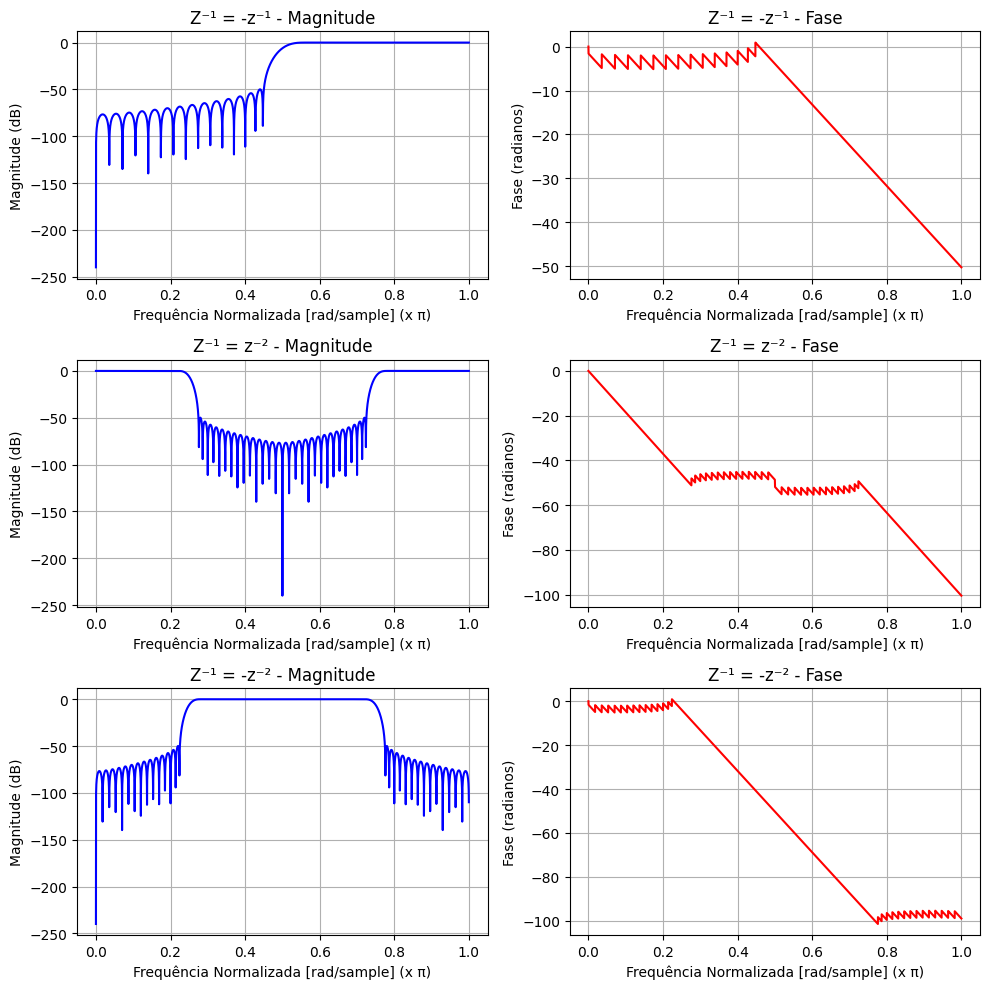

In [ ]:


b1 = coef * ((-1) ** np.arange(len(coef))) # trasnforma Z^−1 = −z^−1 ---> h[n](-1)^n
# tranforma Z^−1 = z^−2
b2 = np.zeros(2*len(coef) - 1) # cria vetor de zeros com tamanho 2N-1
b2[::2] = coef # insere zeros entre os coeficientes
# Transforma Z^−1 = -z^−2
b3 = np.zeros(2*len(coef) - 1) # cria vetor de zeros com tamanho 2N-1
b3[::2] = coef * ((-1)**np.arange(len(coef))) 

w1, h1 = signal.freqz(b1, worN=8000)
w2, h2 = signal.freqz(b2, worN=8000)
w3, h3 = signal.freqz(b3, worN=8000)

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
eps = 1e-12
hs = [h1, h2, h3]
filtros = ['Z⁻¹ = -z⁻¹', 'Z⁻¹ = z⁻²', 'Z⁻¹ = -z⁻²']

for i in range(3):
    axs[i,0].plot(w1/np.pi, 20 * np.log10(np.abs(hs[i]) + eps), 'b')
    axs[i,0].set_title(f'{filtros[i]} - Magnitude')
    axs[i,0].set_xlabel("Frequência Normalizada [rad/sample] (x π)")
    axs[i,0].set_ylabel('Magnitude (dB)') 
    axs[i,0].grid()

    axs[i,1].plot(w1/np.pi, np.unwrap(np.angle(hs[i])), 'r')
    axs[i,1].set_title(f'{filtros[i]} - Fase')
    axs[i,1].set_xlabel("Frequência Normalizada [rad/sample] (x π)")
    axs[i,1].set_ylabel('Fase (radianos)')
    axs[i,1].grid()
plt.tight_layout()
plt.show()


Como esperado,  na transformação Z⁻¹ = -z⁻¹ houve uma inversão espectral, **virando um passa alta e a fase continua linear.** 

Na transformação Z⁻¹ = z⁻², **o filtro parece um rejeita faixa**, mas na verdade é um passa baixa com réplica espectral. A sua fase é linear por trechos,  com o dobro do atraso de grupo, devido ao aumento da inclinação.

Na transformação Z⁻¹ = -z⁻², **o filtro parece um passa faixa**, mas na verdade é um passa baixa com compressão espectral deslocado. A sua fase é linear por trechos,  com o dobro do atraso de grupo, devido ao aumento da inclinação. A fase é preservada.

